_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 79us/step - loss: 0.6917 - acc: 0.5099 - val_loss: 0.6895 - val_acc: 0.5254
Epoch 2/40
15000/15000 [==============================] - 1s 64us/step - loss: 0.

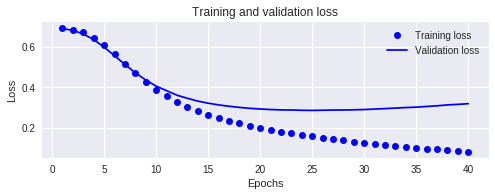

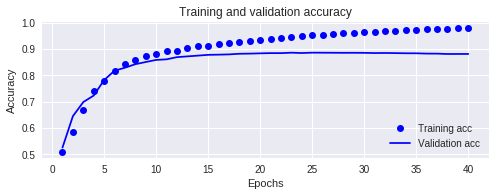

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
#print("Testing entries: {}, labels: {}".format(len(test_data), len(test_labels)))

#print(train_data[:5])
#print(train_labels[:5])
#print(test_data[:5])
#print(test_labels[:5])
#for i in range(0, 10):
#  print(len(train_data[i])) # all with different lengths

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#print(len(word_index)) #88588
#print(len(reverse_word_index)) #88588
#for i in range(0, 5):
#  print(reverse_word_index[i])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
  
#print(decode_review(train_data[0]))
#print(decode_review(train_data[24999]))

# pad each reviews to have the same length
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

#len(train_data[0]), len(train_data[1]) #256, 256

# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()

# configure loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy', # or mean_squared_error
              metrics=['accuracy'])

# create a validation set
x_val = train_data[:10000] # 10000
y_val = train_labels[:10000]
partial_x_train = train_data[10000:] # 15000
partial_y_train = train_labels[10000:]

# train the model
history = model.fit(partial_x_train, # train on 15000 samples
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val), # validate on 10000 samples
                    verbose=1)

# evaluate the model
results = model.evaluate(test_data, test_labels)
print(results)

# create a graph over loss and accuracy over time
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(acc) + 1)


plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo' = blue dot
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b' = solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()